# Exploting dataset

## Report of data analysis

In [247]:
import numpy as np
import pandas as pd
#import pandas_profiling as pp
import copy

data = pd.read_csv("E://UIUC/577/milestone/hotel_bookings.csv")
dataCopy = copy.deepcopy(data)
#profile = pp.ProfileReport(data)
#profile.to_file("output_file.html")

## Overview of the dataset

In [248]:
# the booking was canceled (1) or not (0)
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [249]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [250]:
data.describe() 

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [251]:
data.describe().lead_time

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

# Data cleaning

## Missing value

In [252]:
# View the number of missing values in each feature
data.isnull().sum(axis=0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Missing values are from namely country, agent, company, and children.

"company" column is deleted, because the "company" missing rate reaches more than 90%. Too many missing will affect the prediction of the later model.

"children" has the least missing values, so uses mode to replace missing values.

The missing values of the "agent" are replaced with 0, because these missing values are likely to be individual customers.

"country" also uses mode to replace missing values.


In [253]:
#agent & company缺失最多
# 处理children, 默认没有children入住，用0填充--还是用mode填充
data['children'].fillna(data['children'].mode()[0],inplace=True)
#处理country,用mode填补
data['country'].fillna(value=data['country'].mode()[0],inplace=True)
#删除company,缺失值太多
data.drop('company',axis=1,inplace=True)
#处理agent默认用0填充，个人用户
data['agent'].fillna(0,inplace=True)
#check
data.isnull().sum(axis=0)
# 考虑market_segment，distribution_channel两者选其一

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Outlier

In [254]:
#异常值（出现adr<0的情况）
outlier = data["adr"][data["adr"].map(lambda x: True if x < 0  else False)]
print(outlier)
data.drop(axis=0, index = 14969, inplace=True)

#删除adults & children & babies=0
nonGuest = data[data[["adults", "children", "babies"]].sum(axis=1)==0]
data.drop(nonGuest.index, inplace=True)

#stays_in_weekend_nights & stays_in_week_nights = 0
nonStay = data[data[['stays_in_weekend_nights', 'stays_in_week_nights']].sum(axis=1) == 0]
data.drop(nonStay.index, inplace=True)

#meal--Undefined/SC – no meal package
data.meal.replace("Undefined", "SC", inplace=True)

#market_segment中undefined用mode替代
data.market_segment.replace('Undefined',data['market_segment'].mode()[0], inplace=True)

#distribution_channel中undefined用mode替代
data.distribution_channel.replace('Undefined',data['distribution_channel'].mode()[0], inplace=True)

14969   -6.38
Name: adr, dtype: float64


In [255]:
data.keys()

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

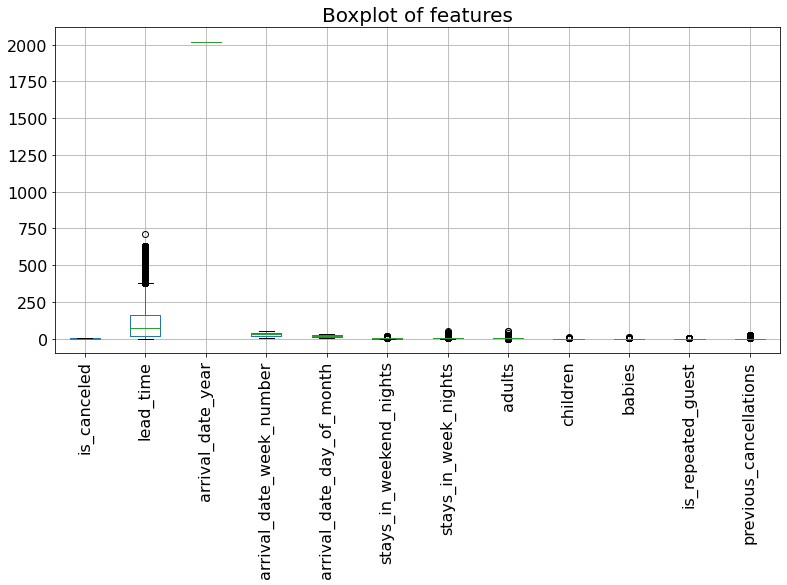

In [256]:
#boxplot看outlier--因为features太多，所以分两个图
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
data[['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations']].boxplot()
plt.title('Boxplot of features',fontsize=20)
plt.xticks(rotation=90)#旋转横坐标
plt.tick_params(labelsize=16)#增大横坐标刻度大小
plt.show()

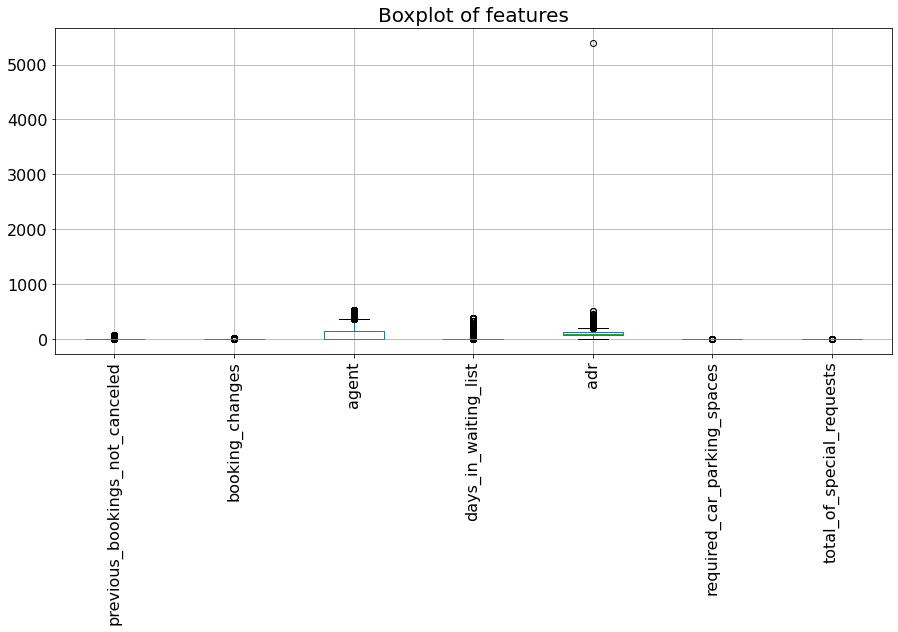

In [257]:
plt.figure(figsize=(15,6))
data[['previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent'
      , 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date']].boxplot()
plt.title('Boxplot of features',fontsize=20)
plt.xticks(rotation=90)#旋转横坐标
plt.tick_params(labelsize=16)#增大横坐标刻度大小
plt.show()

In [258]:
#从boxplot中可以看到有一个outlier, 删除adr中max_value异常点
maxValue = max(data.adr)
location = data[(data.adr==maxValue)].index.tolist()
data.drop(axis=0, index = location, inplace=True)
#或者用mode值进行替代
#data.adr.replace(maxValue, data.adr.mode()[0], inplace=True)

In [259]:
data.describe().lead_time

count    118563.000000
mean        104.505655
std         106.915907
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         709.000000
Name: lead_time, dtype: float64

In [260]:
#对boxplot中超过上限的异常点replace--median
#maxLevel = data.describe().lead_time['75%']+3*data.describe().lead_time['25%']
#for index in data.lead_time.index:
#    if data.lead_time[index] > maxLevel:
#        data.lead_time[index] = data.lead_time.mean()

In [261]:
#Check是否已经替换
#data.lead_time.describe()

## Convert data type

In [262]:
# 把object转换成numeric
data['arrival_date_month_num'] = data['arrival_date_month'].map({'January':1,'February':2,'March':3, 'April':4, 'May':5, 'June':6, 
                              'July':7,'August':8,'September':9,'December':12, 'October':10,'November':11})

In [263]:
hotel = data['hotel']
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

# EDA

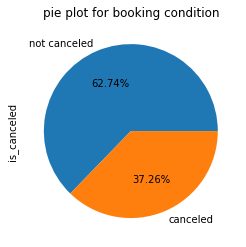

In [264]:
data['is_canceled'].value_counts().plot(x=None,y=None, kind='pie',autopct='%1.2f%%',labels=['not canceled','canceled'])
plt.title("pie plot for booking condition")
plt.show()

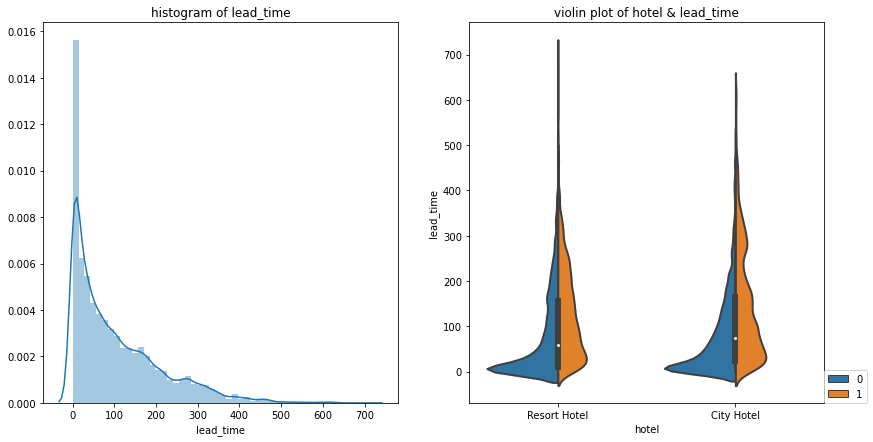

In [265]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(14,7))
sns.distplot(data.lead_time,ax=axs[0])
axs[0].set_title("histogram of lead_time")

sns.violinplot(x=hotel,y='lead_time',hue='is_canceled',data=data, split=True,linewidth=2,ax=axs[1])
axs[1].set_title('violin plot of hotel & lead_time')
axs[1].legend(bbox_to_anchor=(1,0),loc=3,borderaxespad=0)
plt.show()

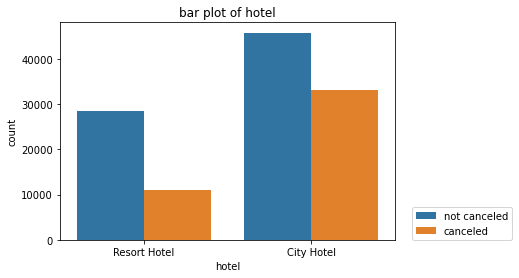

In [266]:
#hotel & canceled
sns.countplot(x=hotel, hue='is_canceled', data=data)
plt.legend(bbox_to_anchor=(1.05, 0),loc=3, borderaxespad=0,labels=['not canceled','canceled'])
plt.title('bar plot of hotel')
plt.show()

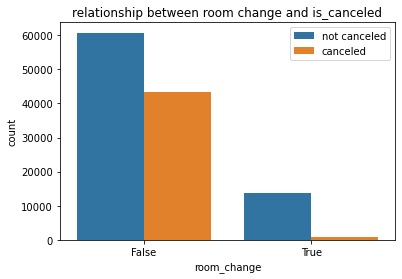

In [267]:
#房间类型change对is_canceled的影响
data['room_change'] = data['reserved_room_type']!=data['assigned_room_type']
sns.countplot(x='room_change', hue='is_canceled', data=data)
plt.legend(labels=['not canceled','canceled'])
plt.title('relationship between room change and is_canceled')
plt.show()

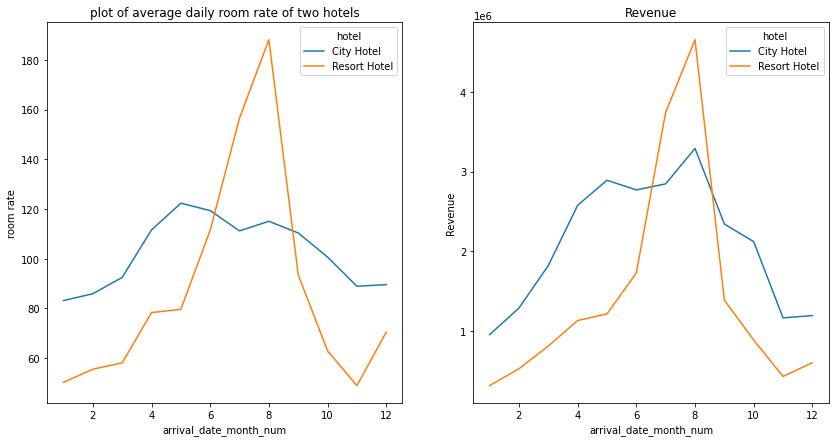

In [268]:
#每日价格和month之间的关系
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(14,7))
data.pivot_table(values='adr',index='arrival_date_month_num',columns=hotel,aggfunc='mean').plot(ax=axs[0])
axs[0].set_title('plot of average daily room rate of two hotels')
axs[0].set_ylabel('room rate')

data['total_adr']=(data['stays_in_weekend_nights']+data['stays_in_week_nights'])*data['adr']
data.pivot_table(values='total_adr',index='arrival_date_month_num',columns=hotel,aggfunc='sum').plot(ax=axs[1])
axs[1].set_title('Revenue')
axs[1].set_ylabel('Revenue')

plt.show()

In [269]:
#添加一列为抵达日期'arrival_date'，并令其数据类型为日期型
data['arrival_date']=data['arrival_date_year'].map(str)+'/'+data['arrival_date_month'].map(str)+'/'+data['arrival_date_day_of_month'].map(str)
data['arrival_date']=data['arrival_date'].astype('datetime64[ns]')

In [270]:
single = (data.adults == 1) & (data.children == 0) & (data.babies == 0)
couple = (data.adults == 2) & (data.children == 0) & (data.babies == 0)
family = (data.adults >= 2) & (data.children > 0) | (data.babies > 0)
data['type_of_customer'] = single.astype(int) + couple.astype(int) * 2 + family.astype(int) * 3     

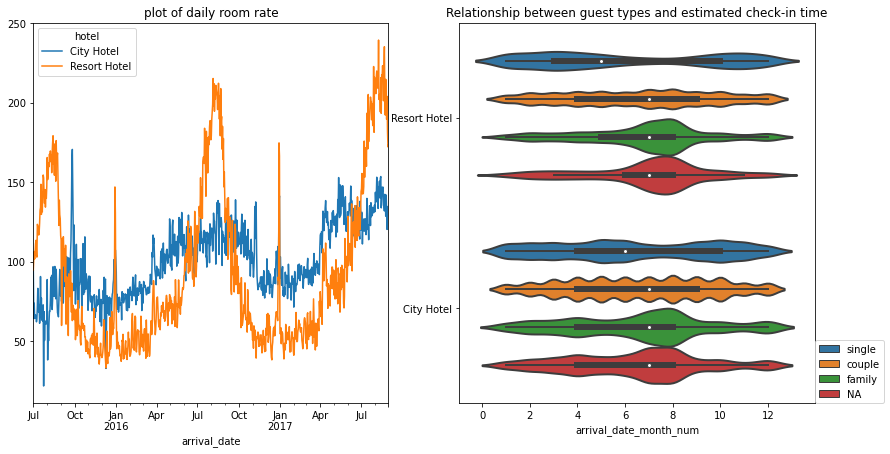

In [271]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2,figsize=(14,7))
data.pivot_table(values='adr',index='arrival_date',columns=hotel).plot(ax=axs[0])
axs[0].set_title('plot of daily room rate')

data['type_of_customer'] = data['type_of_customer'].map({0: 'NA', 1: 'single',2: 'couple', 3: 'family'})
sns.violinplot(x='arrival_date_month_num',y=hotel,hue='type_of_customer',data=data,linewidth=2,ax=axs[1])
axs[1].set_title('Relationship between guest types and estimated check-in time')
axs[1].set_ylabel(' ')
axs[1].legend(bbox_to_anchor=(1,0),loc=3,borderaxespad=0)
plt.show()

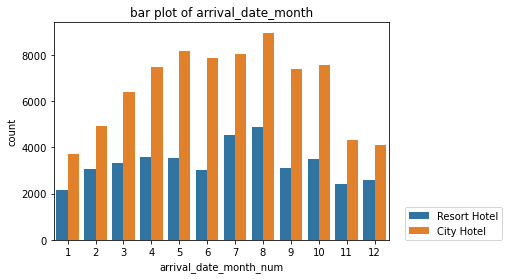

In [272]:
# arrive_date_month & hotel
import matplotlib.pyplot as plt
sns.countplot(x='arrival_date_month_num', hue=hotel, data=data)
plt.legend(bbox_to_anchor=(1.05, 0),loc=3, borderaxespad=0)
plt.title('bar plot of arrival_date_month')
plt.show()

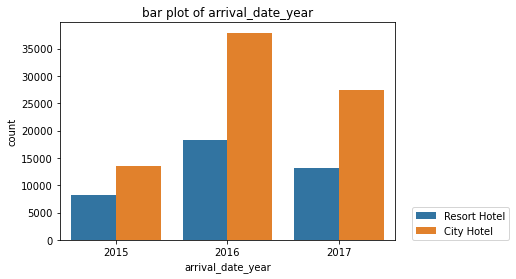

In [273]:
# arrive_date_year & hotel
import matplotlib.pyplot as plt
sns.countplot(x='arrival_date_year', hue=hotel, data=data)
plt.legend(bbox_to_anchor=(1.05, 0),loc=3, borderaxespad=0)
plt.title('bar plot of arrival_date_year')
plt.show()

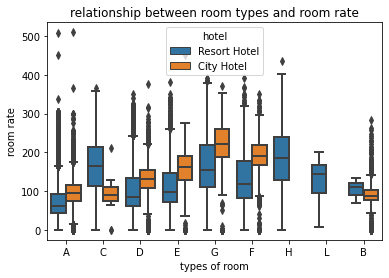

In [274]:
#两家酒店各类型房间日均收费比较
sns.boxplot(x='reserved_room_type',y='adr',hue=hotel,data=data.query('adr<1000'),linewidth=2)
plt.title('relationship between room types and room rate')
plt.xlabel("types of room")
plt.ylabel("room rate")
plt.show()

# The correlation between features

## corr()

In [275]:
data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date_month_num,room_change,total_adr
hotel,1.000000,0.135637,0.074976,0.034083,0.001906,-0.001662,-0.191685,-0.241843,-0.011053,-0.044205,-0.043826,-0.052371,-0.012619,-0.004291,-0.076497,-0.652071,0.072588,0.098088,-0.220161,-0.043963,0.002401,-0.144917,-0.168159
is_canceled,0.135637,1.000000,0.291532,0.015448,0.009023,-0.006127,-0.004829,0.020725,0.057574,0.004679,-0.032672,-0.077764,0.109975,-0.057533,-0.145201,-0.046298,0.053942,0.040142,-0.196805,-0.236165,0.011879,-0.244854,0.042076
lead_time,0.074976,0.291532,1.000000,0.039613,0.127881,0.002475,0.082894,0.163141,0.116980,-0.038276,-0.021035,-0.116184,0.085886,-0.073797,0.001208,-0.012928,0.169905,-0.076636,-0.117525,-0.096992,0.132408,-0.138502,0.082659
arrival_date_year,0.034083,0.015448,0.039613,1.000000,-0.540307,0.000338,0.020226,0.029226,0.030286,0.054992,-0.013047,0.012369,-0.120345,0.029268,0.031559,0.058051,-0.056698,0.208104,-0.014254,0.109640,-0.527480,-0.096213,0.123707
arrival_date_week_number,0.001906,0.009023,0.127881,-0.540307,1.000000,0.066590,0.019203,0.016814,0.026912,0.005749,0.010163,-0.033111,0.035659,-0.021139,0.006221,-0.018919,0.022843,0.083330,0.002100,0.025796,0.995091,0.005639,0.060542
arrival_date_day_of_month,-0.001662,-0.006127,0.002475,0.000338,0.066590,1.000000,-0.016360,-0.028678,-0.001414,0.014485,-0.000225,-0.005193,-0.027087,-0.000285,0.011326,0.000097,0.022558,0.031056,0.008567,0.003345,-0.026416,-0.004854,-0.002862
stays_in_weekend_nights,-0.191685,-0.004829,0.082894,0.020226,0.019203,-0.016360,1.000000,0.490952,0.093893,0.045985,0.018683,-0.078386,-0.013285,-0.043093,0.051100,0.164194,-0.055164,0.044008,-0.019364,0.072972,0.019375,-0.074073,0.573700
stays_in_week_nights,-0.241843,0.020725,0.163141,0.029226,0.016814,-0.028678,0.490952,1.000000,0.095039,0.044449,0.020500,-0.083609,-0.014733,-0.049253,0.081608,0.199622,-0.002922,0.056701,-0.026188,0.068510,0.020467,-0.086771,0.707046
adults,-0.011053,0.057574,0.116980,0.030286,0.026912,-0.001414,0.093893,0.095039,1.000000,0.028882,0.017751,-0.143295,-0.007188,-0.108835,-0.041332,0.023238,-0.008581,0.235666,0.014117,0.122963,0.029560,-0.053782,0.190510
children,-0.044205,0.004679,-0.038276,0.054992,0.005749,0.014485,0.045985,0.044449,0.028882,1.000000,0.024181,-0.031657,-0.024835,-0.021060,0.051327,0.050288,-0.033404,0.345607,0.056383,0.081975,0.005682,-0.012406,0.232936


## heatmap()

In [276]:
data.drop('arrival_date',axis=1,inplace=True)
data.drop('arrival_date_month_num',axis=1,inplace=True)
data.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

D:\Anaconda\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


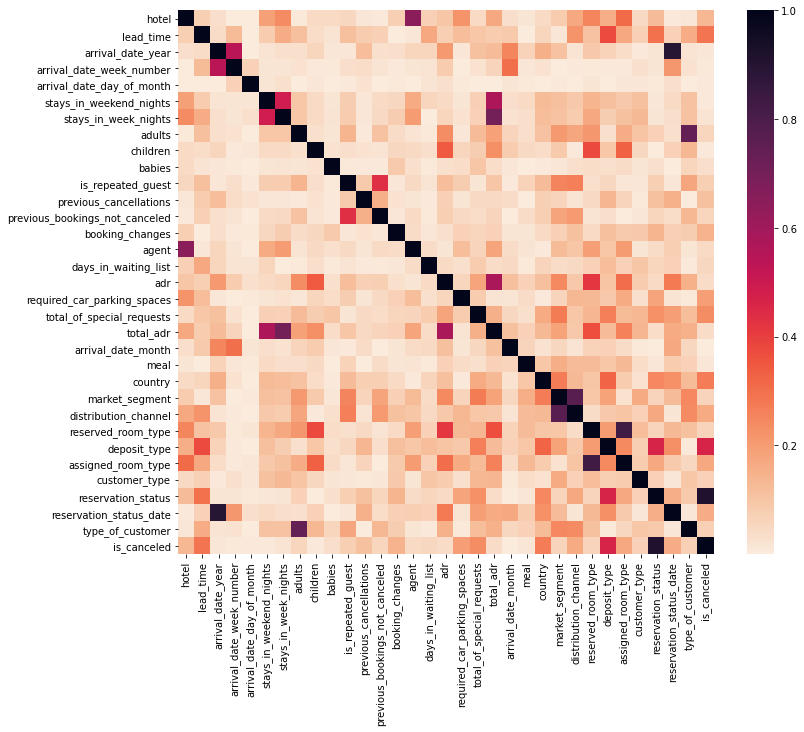

In [278]:
from sklearn.preprocessing import LabelEncoder
num = [
    'hotel','lead_time','arrival_date_year' ,'arrival_date_week_number',
    'arrival_date_day_of_month','stays_in_weekend_nights', 'stays_in_week_nights', 
    'adults', 'children','babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled','booking_changes', 'agent','days_in_waiting_list', 'adr',
    'required_car_parking_spaces','total_of_special_requests', 'total_adr'
]
obj = [
    'arrival_date_month', 'meal','country', 'market_segment','distribution_channel', 'reserved_room_type', 
    'deposit_type','assigned_room_type','customer_type','reservation_status','reservation_status_date',
    'type_of_customer'
]
target = ['is_canceled']

ref = num+obj+target
train = data[ref]
train[obj]=train[obj].apply(LabelEncoder().fit_transform)
#OneHotEncoder( sparse=False ).fit_transform(train[obj].reshape(-1,1))
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr().abs(), cmap=sns.cm.rocket_r)

## Standardization

In [279]:
from sklearn.preprocessing import StandardScaler 
dataScaler = train.drop('is_canceled', axis=1)
dataScaler.drop('arrival_date_month', axis=1,inplace=True)
target = data['is_canceled']

sc = StandardScaler()
dataScaler = sc.fit_transform(dataScaler)

array([[-1.41035768, -0.91198839, -1.63573438, ...,  0.7072527 ,
        -1.73457574,  1.88396766],
       [-1.41035768, -0.85586929, -1.63573438, ...,  0.7072527 ,
        -1.73457574,  1.88396766],
       [-1.41035768, -0.8465161 , -1.63573438, ...,  0.7072527 ,
        -1.73018322, -0.46586121],
       ...,
       [ 0.70903999, -0.65945241,  1.1902729 , ...,  0.7072527 ,
         1.77065484, -0.46586121],
       [ 0.70903999,  0.04203644,  1.1902729 , ...,  0.7072527 ,
         1.77065484, -0.46586121],
       [ 0.70903999,  0.93994216,  1.1902729 , ...,  0.7072527 ,
         1.77065484, -0.46586121]])